# Projet Vinasse
## Introduction
Ce notebook a pour objectif de vous présenter notre analyse de données sur des datasets liés au vin.
L'objectif principal de ce projet est donc de réaliser une analyse exploratoire des données. Ce notebook présente chaque étape du processus, tout en fournissant des visualisations détaillées pour faciliter la compréhension des résultats.

## Jeux de données
Afin de réaliser cette analyse, nous avons sélectionné différents datasets :

"winemag.csv" qui provient de Kaggle (https://www.kaggle.com/datasets/mysarahmadbhat/wine-tasting).
Ce fichier CSV contient les prix et les notations de nombreux vins à travers le monde.

"wine-production.csv" qui provient de *"Food and Agriculture Organization of the United Nations (2023)" – avec un traitement majeur par Our World in Data*.
Ce fichier CSV contient les productions de vin par année dans différentes régions.

## Structure du notebook 

[Installation des prérequis](#INSTALLATION-DES-PREREQUIS)

[Nettoyage des données](#NETTOYAGE-DES-DONNEES)  

[Analyse des données](#ANALYSE-DES-DONNEES) 

[Modélisation](#MODELISATION)  

[Conclusion](#CONCLUSION)


# INSTALLATION DES PREREQUIS

In [1]:
%pip install -r requirements.txt

^C
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NETTOYAGE DES DONNEES


## nettoyage de "winemag.csv"

In [3]:
%matplotlib inline
file_path = "data/winemag.csv"  # Modifier avec le chemin correct
df = pd.read_csv(file_path)

In [4]:
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)


Valeurs manquantes par colonne :
 id                           0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [7]:
df.describe()

,id,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [8]:
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


## Nettoyage de "wine-prodution"


In [41]:
file_path = "data/wine-production/wine-production.csv"  # Modifier avec le chemin correct
df_prod = pd.read_csv(file_path)

In [42]:
df_prod.head()

,Entity,Code,Year,Wine
0,Africa,NaN,1961,2041926.0
1,Africa,NaN,1962,2232189.0
2,Africa,NaN,1963,2070770.0
3,Africa,NaN,1964,1856545.0
4,Africa,NaN,1965,2389869.0


In [43]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  5969 non-null   object 
 1   Code    3765 non-null   object 
 2   Year    5969 non-null   int64  
 3   Wine    5969 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 186.7+ KB


In [45]:
missing_values = df_prod.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 Entity       0
Code      2204
Year         0
Wine         0
dtype: int64


In [44]:
duplicates = df_prod.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


# ANALYSE DES DONNEES 

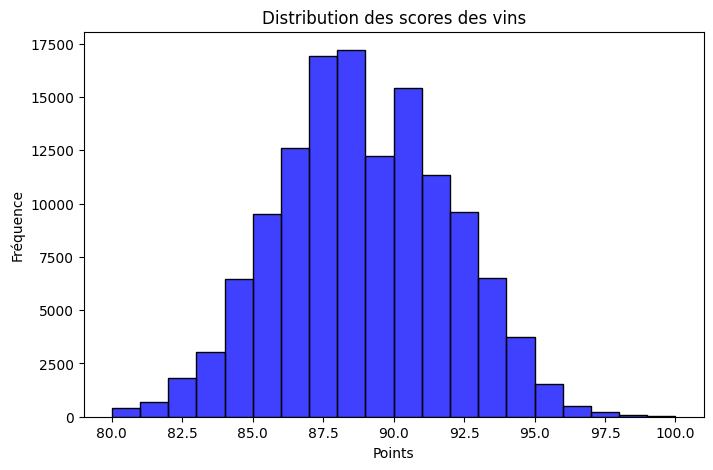

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(df["points"], bins=20, kde=False, color="blue")
plt.title("Distribution des scores des vins")
plt.xlabel("Points")
plt.ylabel("Fréquence")
plt.show()

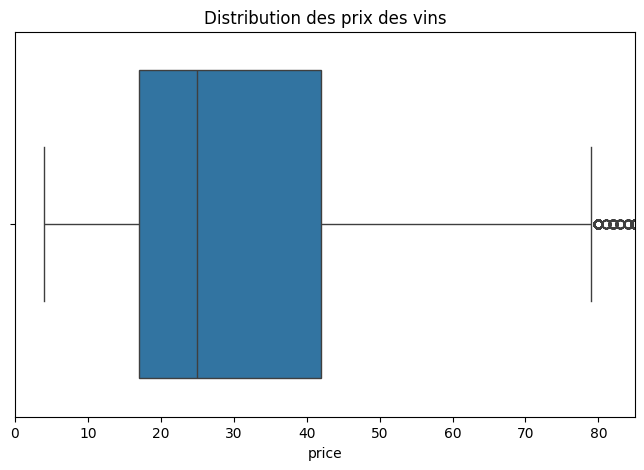

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["price"])
plt.xlim(0, df["price"].quantile(0.95))  # Limite pour exclure les valeurs extrêmes
plt.title("Distribution des prix des vins")
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_25408\2704247306.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


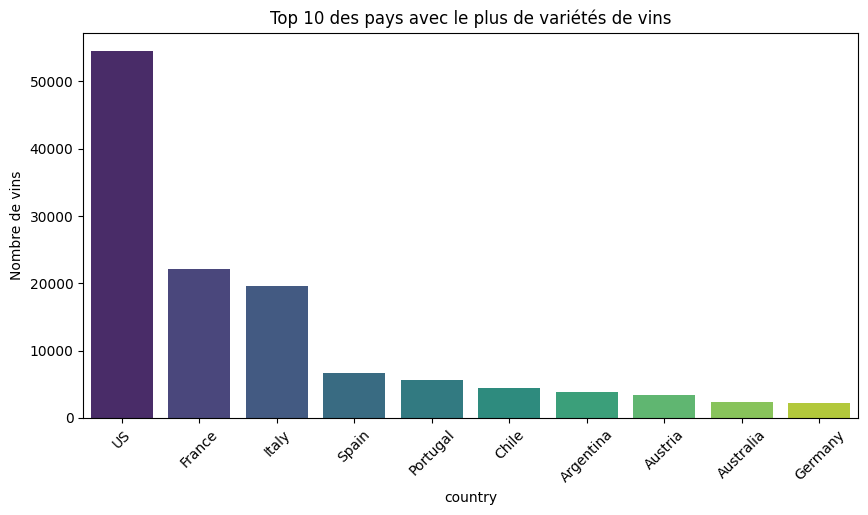

In [40]:
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title("Top 10 des pays avec le plus de variétés de vins")
plt.ylabel("Nombre de vins")
plt.xticks(rotation=45)
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_25408\2183726549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_country.index, y=avg_price_country.values, palette="coolwarm")


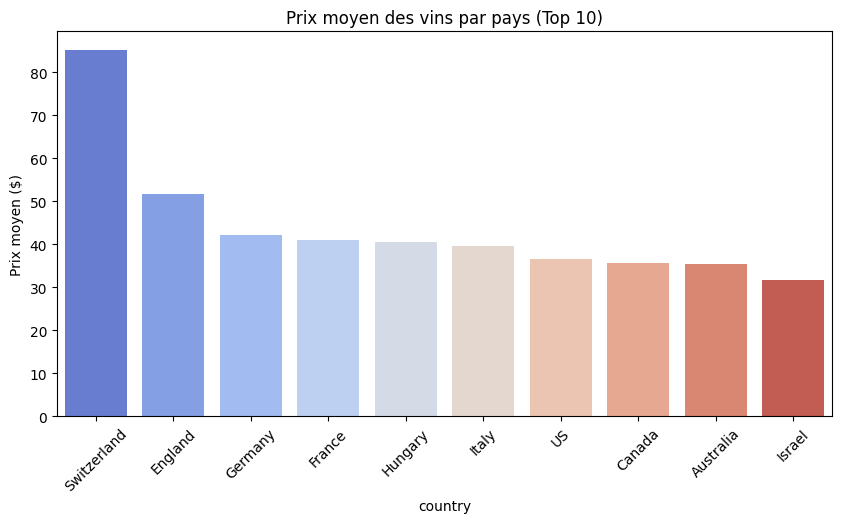

In [14]:
avg_price_country = df.groupby("country")["price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_country.index, y=avg_price_country.values, palette="coolwarm")
plt.title("Prix moyen des vins par pays (Top 10)")
plt.ylabel("Prix moyen ($)")
plt.xticks(rotation=45)
plt.show()

C:\Users\phili\AppData\Local\Temp\ipykernel_25408\707907484.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_varieties.index, y=top_varieties.values, palette="magma")


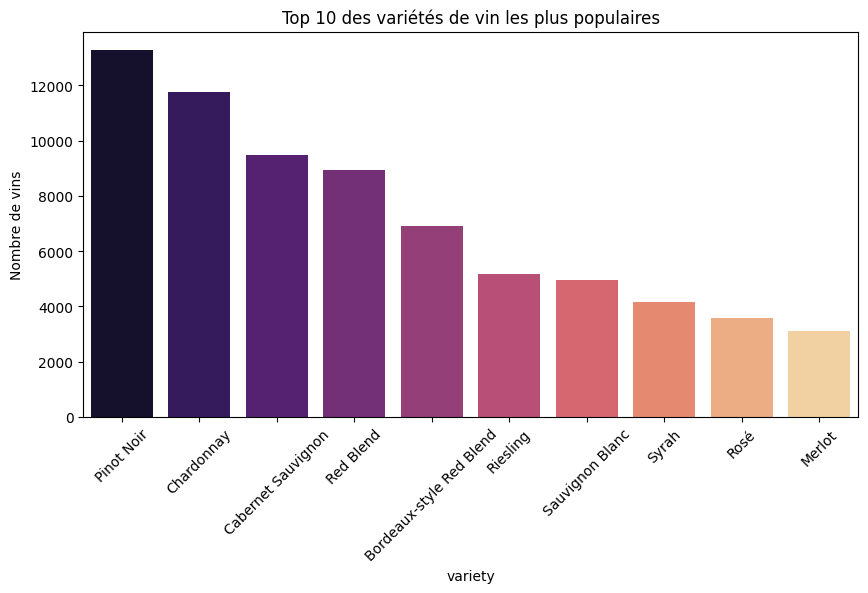

In [15]:
top_varieties = df["variety"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette="magma")
plt.title("Top 10 des variétés de vin les plus populaires")
plt.ylabel("Nombre de vins")
plt.xticks(rotation=45)
plt.show()

In [37]:
# Select only numerical columns
#numerical_df = df.select_dtypes(include=[np.number])

#plt.figure(figsize=(8,6))
#sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
#plt.title("Matrice de corrélation")
#plt.show()

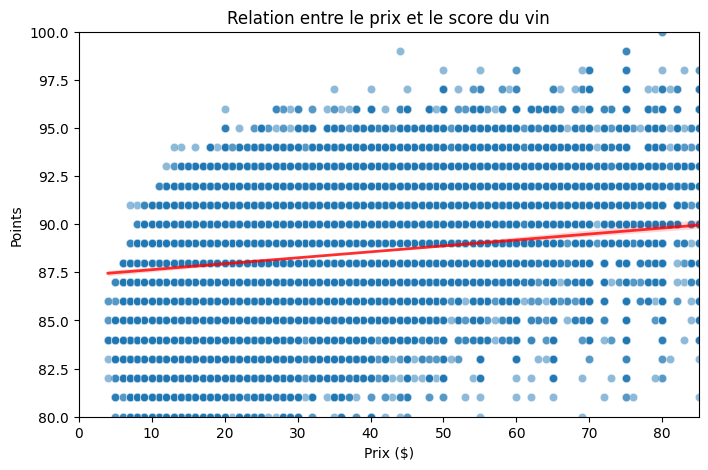

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["price"], y=df["points"], alpha=0.5)
sns.regplot(x=df["price"], y=df["points"], scatter=False, color="red", line_kws={"linewidth": 2, "alpha": 0.8})
plt.xlim(0, df["price"].quantile(0.95))  # Exclure les valeurs extrêmes
plt.ylim(80, 100)
plt.title("Relation entre le prix et le score du vin")
plt.xlabel("Prix ($)")
plt.ylabel("Points")
plt.show()

# CONCLUSION